In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [28]:
train_dir = '/Users/aadityajoshi/Downloads/archive-7/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train'

In [29]:
val_dir = '/Users/aadityajoshi/Downloads/archive-7/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val'

In [30]:
test_dir = '/Users/aadityajoshi/Downloads/archive-7/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test'

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

In [33]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(256,256),
                                               class_mode='binary',
                                               batch_size=32,
                                              shuffle=True)

Found 9246 images belonging to 2 classes.


In [34]:
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(256,256),
                                             class_mode='binary',
                                             batch_size=32,
                                            shuffle=False)

Found 506 images belonging to 2 classes.


In [35]:
val_data = val_datagen.flow_from_directory(val_dir,
                                            target_size=(256,256),
                                            class_mode='binary',
                                            batch_size=32,
                                          shuffle=False)

Found 829 images belonging to 2 classes.


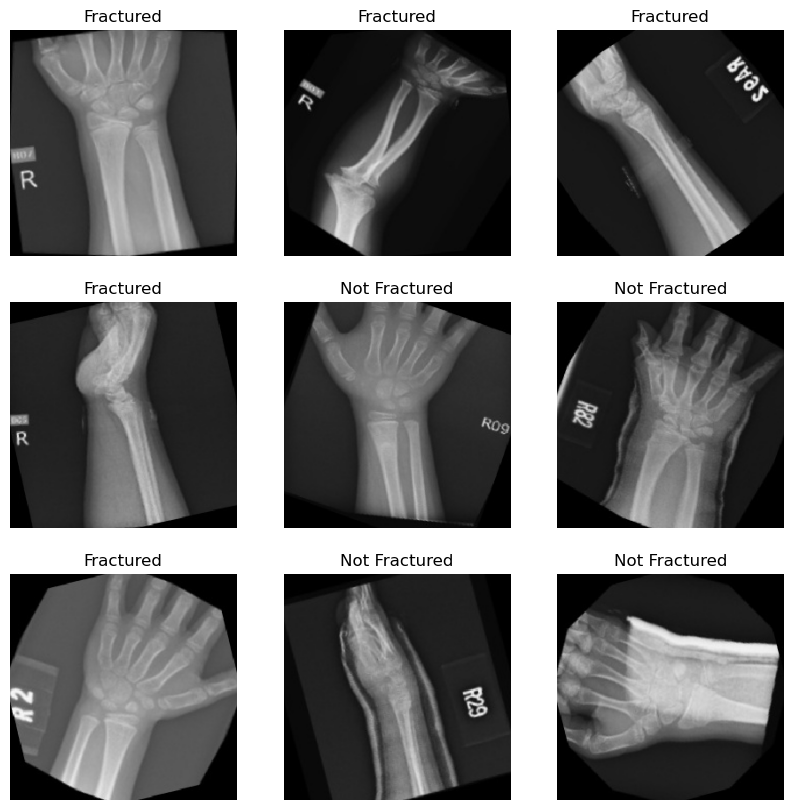

In [10]:
def show_batch_of_images(dataset):
    images, labels = next(dataset)  # Get a batch of images and labels
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title('Fractured' if labels[i] == 1 else 'Not Fractured')
        plt.axis('off')
    plt.show()

# Show some images from training data
show_batch_of_images(train_data)

In [11]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Activation,Input
from tensorflow.keras.models import Sequential

In [36]:
def create_cnn():
    #create model
    model = Sequential()
    model.add(Input(shape=(256,256,3)))
    #conv1 
    model.add(Conv2D(filters=16,kernel_size=(3,3)))
    #maxpool
    model.add(MaxPooling2D((2,2)))
    #batchnorm
    model.add(BatchNormalization(axis=3))
    model.add(Activation('relu'))
    model.add(Flatten())
    #Fully connnected layer
    model.add(Dense(64,activation='relu'))
    #layer2 
    model.add(Dense(64,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam')
    model.summary()
    return model

In [41]:
from tensorflow.keras.backend import clear_session
clear_session()
model = create_cnn()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 127, 127, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 258064)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    16,516,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,520,897 (63.02 MB)

 Trainable params: 16,520,865 (63.02 MB)

 Non-trainable params: 32 (128.00 B)

In [45]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
with tf.device('/GPU:0'):    
    model.fit(train_data,validation_data=val_data,
             steps_per_epoch=train_data.samples//train_data.batch_size,
             validation_steps=val_data.samples//val_data.batch_size,
             epochs=1)

288/288 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - loss: 0.0119 - val_loss: 0.1206


In [18]:
from PIL import Image
import os

def remove_corrupted_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpeg', 'jpg', 'png')):
                try:
                    img = Image.open(os.path.join(root, file))
                    img.verify()  # Verify that it is an image
                except (IOError, SyntaxError) as e:
                    print(f"Corrupted image found: {file}")
                    os.remove(os.path.join(root, file))

remove_corrupted_images(test_dir)

In [52]:
from pathlib import Path

In [49]:
Path = '/Users/aadityajoshi/Downloads/archive-7/Bone_Fracture_Binary_Classification'

In [53]:
def count_classes(dataset, class_name):
    dataset_path = Path(dataset)  # Convert to Path object
    class_path = dataset_path / class_name
    return len(list(class_path.glob('*'))) 

def create_class_counts_df(dataset, class_names):
    counts = {'class':[], 'count': []}
    for class_name in class_names:
        counts['class'].append(class_name)
        counts['count'].append(count_classes(dataset, class_name))
    return pd.DataFrame(counts)

def plot_class_distribution(df, title, palette="viridis"):
    sns.barplot(x='class', y='count', data=df, palette=palette)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

In [47]:
class_names = ['fractured', 'not fractured']

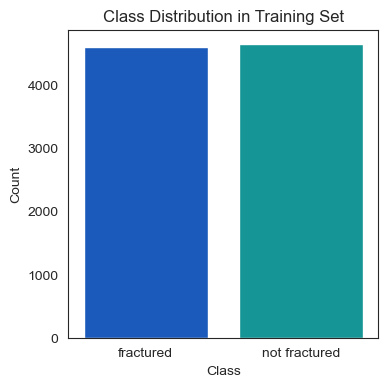

In [60]:
train_df = create_class_counts_df(train_dir, class_names)
sns.set_style('white')
plt.figure(figsize=(4,4))
plot_class_distribution(train_df, 'Class Distribution in Training Set', palette='winter')

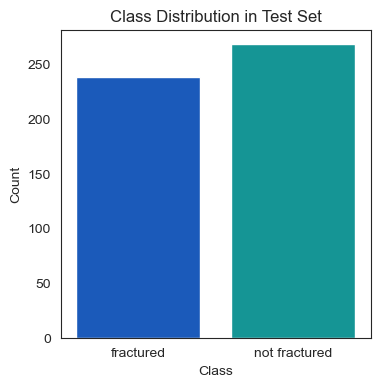

In [61]:
test_df = create_class_counts_df(test_dir, class_names)
sns.set_style('white')
plt.figure(figsize=(4,4))
plot_class_distribution(test_df, 'Class Distribution in Test Set', palette='winter')

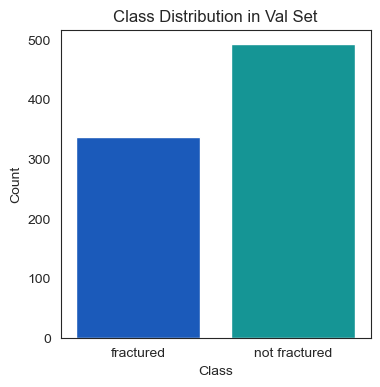

In [62]:
val_df = create_class_counts_df(val_dir, class_names)
sns.set_style('white')
plt.figure(figsize=(4,4))
plot_class_distribution(val_df, 'Class Distribution in Val Set', palette='winter')

In [66]:
test_loss = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {1-test_loss:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0850 
Test Loss: 0.0875
Test Accuracy: 0.9125


In [ ]:
model.save("Bone_Fracture_Classification_16F_")